# **Import Library**

In [1]:
# Library utama
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Peringatan
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# **Load Data**

In [2]:
# Konfigurasi tampilan DataFrame
pd.set_option('display.max_columns', None)
# Load dataset
data = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
# Menampilkan beberapa baris pertama dataset
print("Dataset Awal:")
print(data.head())

Dataset Awal:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0       

# **EDA**

In [4]:
# Ukuran dataset
print(f"\nUkuran Dataset: {data.shape[0]} baris dan {data.shape[1]} kolom")


Ukuran Dataset: 2149 baris dan 35 kolom


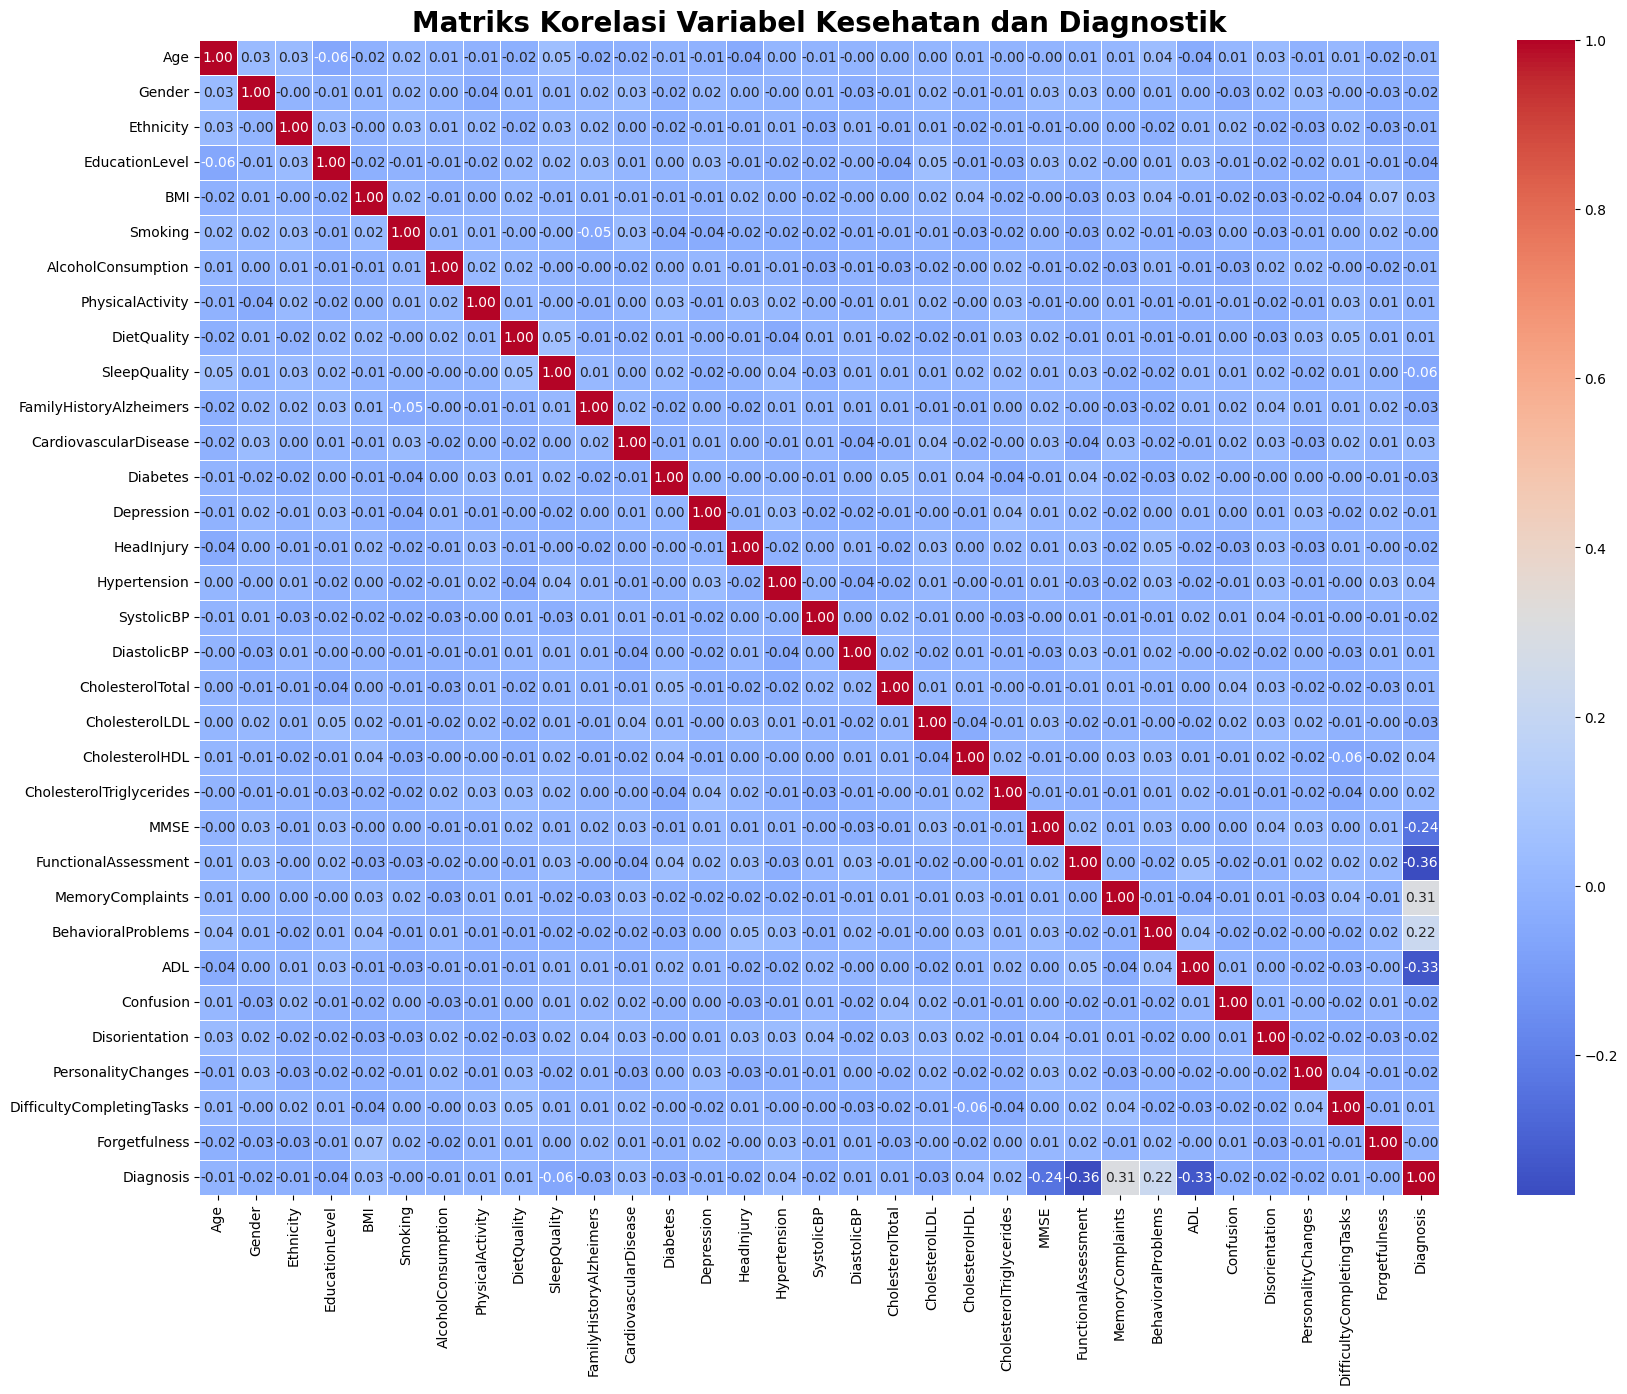

In [5]:
# Visualisasi korelasi fitur
# Ukuran gambar
plt.figure(figsize=(20, 15))

# Hitung matriks korelasi
corr_matrix = data[["Age", "Gender", "Ethnicity", "EducationLevel", "BMI", "Smoking",
                  "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality",
                  "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression",
                  "HeadInjury", "Hypertension", "SystolicBP", "DiastolicBP", "CholesterolTotal",
                  "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
                  "FunctionalAssessment", "MemoryComplaints", "BehavioralProblems", "ADL",
                  "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
                  "Forgetfulness", "Diagnosis"]].corr()

# Membuat heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Variabel Kesehatan dan Diagnostik', fontsize=20, fontweight='bold')
plt.grid(False)
plt.show()

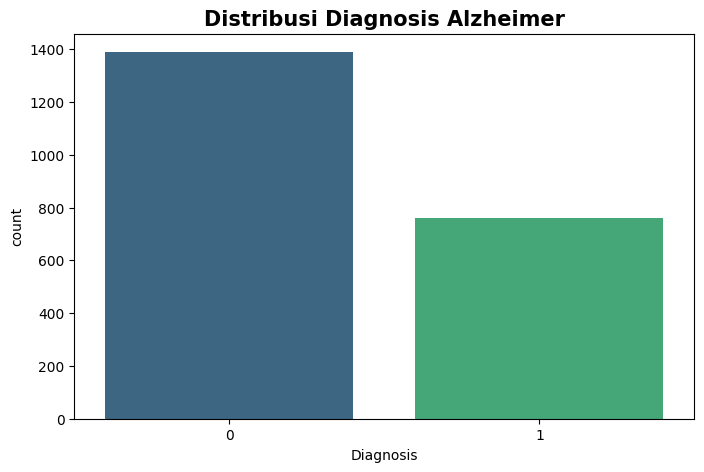

In [6]:
# Cek distribusi diagnosis
plt.figure(figsize=(8, 5))
sns.countplot(x='Diagnosis', data=data, palette='viridis')
plt.title('Distribusi Diagnosis Alzheimer', fontsize=15, fontweight='bold')
plt.show()

# **Pre-Processing**

In [7]:
# Mengecek nilai yang hilang
print("\nCek Nilai Hilang:")
print(data.isnull().sum())


Cek Nilai Hilang:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompleting

In [8]:
# Menghapus data yang memiliki nilai hilang
data = data.dropna()

In [9]:
# Menghapus data duplikat
data = data.drop_duplicates()

In [10]:
# Memisahkan fitur dan label
X = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])  # Menghapus kolom yang tidak relevan
y = pd.get_dummies(data['Diagnosis'], drop_first=True)  # One-hot encoding untuk Diagnosis


# **Pembagian Data**

In [11]:
# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Menampilkan jumlah data setelah preprocessing
print(f"Jumlah data setelah preprocessing: {data.shape[0]} baris dan {data.shape[1]} kolom")

Jumlah data setelah preprocessing: 2149 baris dan 35 kolom


# **Modeling**


**SVM**


Support Vector Machine (SVM):
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87       277
        True       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Confusion Matrix:


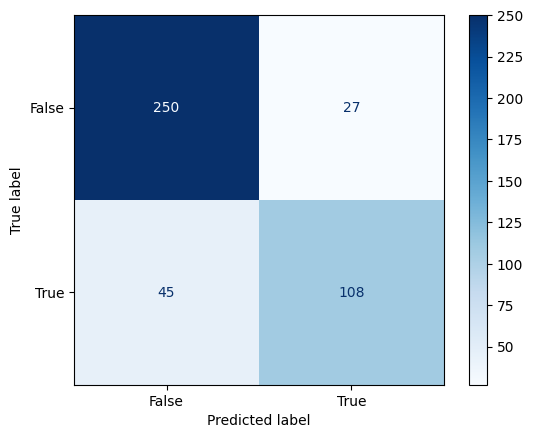

In [14]:
print("\nSupport Vector Machine (SVM):")
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap='Blues')
plt.show()

**Random Forest**


Random Forest:
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       277
        True       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Confusion Matrix:


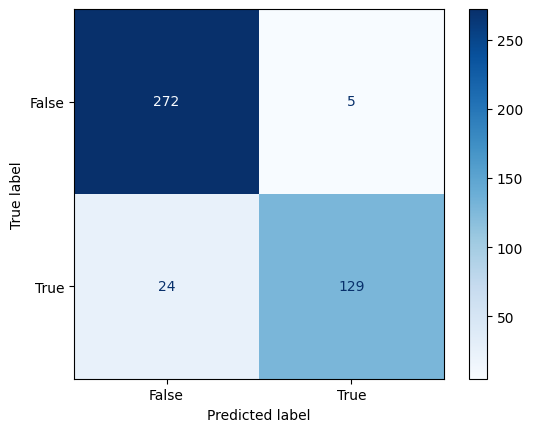

In [15]:
print("\nRandom Forest:")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.show()

**Naive Bayes**


Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       277
        True       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430

Confusion Matrix:


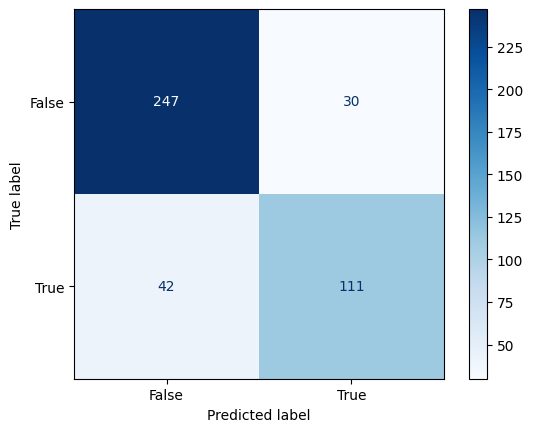

In [16]:
print("\nNaive Bayes:")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap='Blues')
plt.show()

**Artificial Neural Network (ANN)**



**1**.   ***MLP***




Artificial Neural Network (ANN):
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.86      0.85       277
        True       0.74      0.71      0.72       153

    accuracy                           0.81       430
   macro avg       0.79      0.78      0.79       430
weighted avg       0.81      0.81      0.81       430

Confusion Matrix:


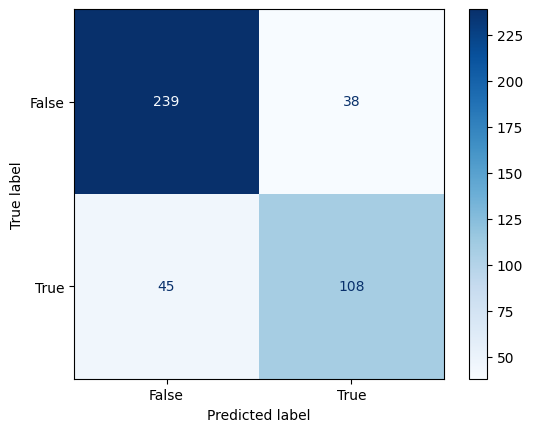

In [34]:
print("\nArtificial Neural Network (ANN):")
ann_model = MLPClassifier(max_iter=300)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(ann_model, X_test, y_test, cmap='Blues')
plt.show()

**1**. ***Tenserflow***

In [17]:
# **Define ANN Model**

model = Sequential()

# Input layer + hidden layer 1
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5282 - loss: 0.7882 - val_accuracy: 0.7047 - val_loss: 0.5584
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.6272 - val_accuracy: 0.7791 - val_loss: 0.4945
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.5514 - val_accuracy: 0.7930 - val_loss: 0.4462
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.4814 - val_accuracy: 0.8163 - val_loss: 0.4062
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7773 - loss: 0.4732 - val_accuracy: 0.8302 - val_loss: 0.3857
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.3938 - val_accuracy: 0.8302 - val_loss: 0.3804
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.4054 - val_accuracy: 0.8279 - val_loss: 0.3784
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8254 - loss: 0.4078 - val_accuracy: 0.8372 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report ANN
              precision    recall  f1-score   support

       False       0.86      0.90      0.87       277
        True       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430

Accuracy: 0.8349
Confusion Matrix:


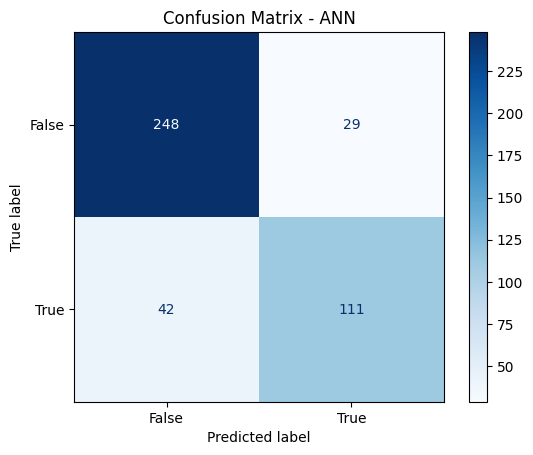

In [23]:
# Predictions and evaluation
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Classification report and accuracy score for ANN
print("Classification Report ANN")
print(classification_report(y_test, y_pred_ann))

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy_ann:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann, cmap='Blues')
plt.title('Confusion Matrix - ANN')
plt.show()

**XGBoost**


XGBoost:
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       277
        True       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

Confusion Matrix:


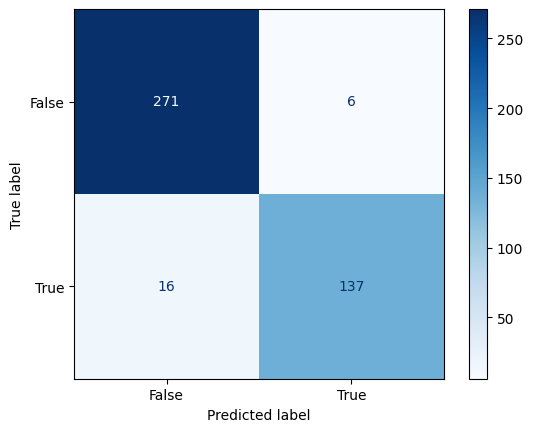

In [24]:
print("\nXGBoost:")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')
plt.show()

In [25]:
accuracy_results = {
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'ANN': accuracy_score(y_test, y_pred_ann),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

# **Visualisasi Hasil Akurasi**

In [26]:
# Urutkan hasil akurasi
accuracy_sorted = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))

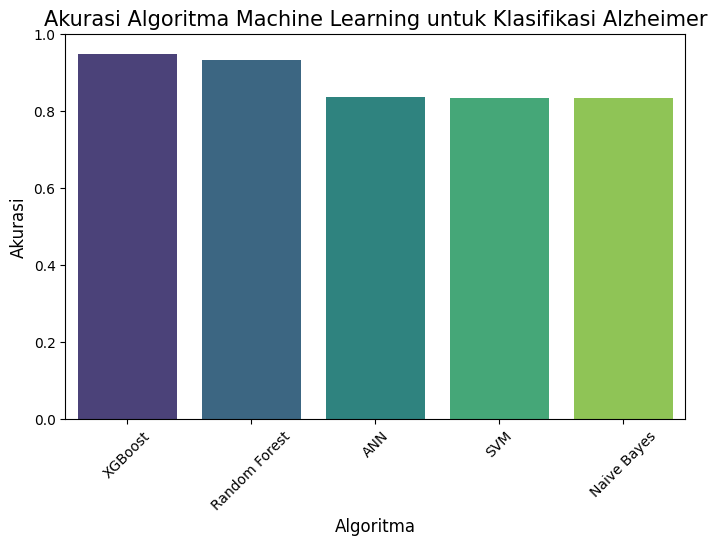


Hasil Akurasi Algoritma Machine Learning:
XGBoost: 0.9488
Random Forest: 0.9326
ANN: 0.8349
SVM: 0.8326
Naive Bayes: 0.8326


In [27]:
# Visualisasi akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_sorted.keys()), y=list(accuracy_sorted.values()), palette='viridis')
plt.title('Akurasi Algoritma Machine Learning untuk Klasifikasi Alzheimer', fontsize=15)
plt.xlabel('Algoritma', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Menampilkan akurasi algoritma
print("\nHasil Akurasi Algoritma Machine Learning:")
for model, accuracy in accuracy_sorted.items():
    print(f"{model}: {accuracy:.4f}")

# **Modeling**


In [ ]:
# Inisialisasi model
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'ANN': MLPClassifier(max_iter=300),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Menyimpan hasil akurasi
accuracy_results = {}

# **Training dan Evaluasi Model**

In [ ]:
for name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

    # Menampilkan Classification Report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


SVM Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87       277
        True       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       277
        True       0.96      0.81      0.88       153

    accuracy                           0.92       430
   macro avg       0.93      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430


Naive Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       277
        True       0.79      0.73      0.76       153

    accuracy                           0.83       430
   macro avg       0.82   

# **Visualisasi Hasil Akurasi**

In [ ]:
# Urutkan hasil akurasi
accuracy_sorted = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))

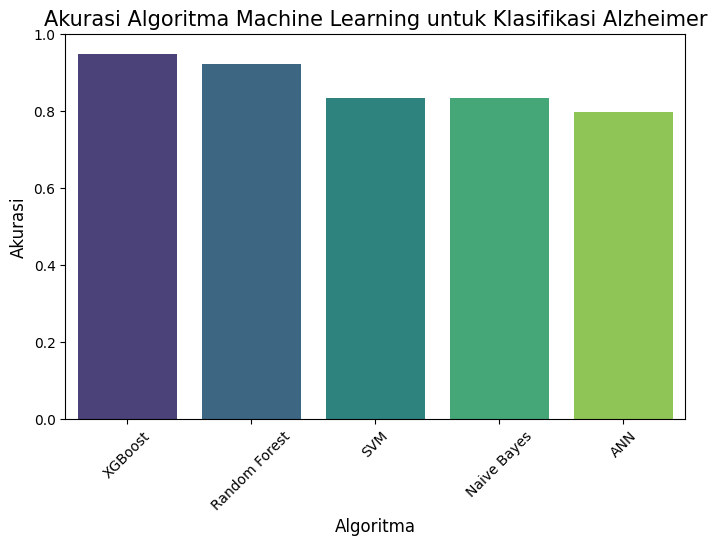


Hasil Akurasi Algoritma Machine Learning:
XGBoost: 0.9488
Random Forest: 0.9209
SVM: 0.8326
Naive Bayes: 0.8326
ANN: 0.7977


In [ ]:
# Visualisasi akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_sorted.keys()), y=list(accuracy_sorted.values()), palette='viridis')
plt.title('Akurasi Algoritma Machine Learning untuk Klasifikasi Alzheimer', fontsize=15)
plt.xlabel('Algoritma', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Menampilkan akurasi algoritma
print("\nHasil Akurasi Algoritma Machine Learning:")
for model, accuracy in accuracy_sorted.items():
    print(f"{model}: {accuracy:.4f}")